In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import plotly.offline as py
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
py.init_notebook_mode(connected=True)
import warnings 
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv("Train_v2.csv")

In [3]:
test = pd.read_csv("Test_v2.csv")

In [4]:
test1 = pd.read_csv('Test_v2.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
train.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [9]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
def preprocess_data(data) :
    dic1 = {"Yes" : 1 , "No" : 0}
    dic2 = {"Rural" : 0 , "Urban" : 1}
    data["location_type"]=data["location_type"].map(dic2)
    data["cellphone_access"]=data["cellphone_access"].map(dic1)
    one_hot = pd.get_dummies(data["gender_of_respondent"])
    data = data.drop("gender_of_respondent",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["country"])
    data = data.drop("country",axis=1)
    data = data.join(one_hot)
    le = LabelEncoder()
    data['relationship_with_head']=le.fit_transform(data['relationship_with_head'])
    data['marital_status']=le.fit_transform(data["marital_status"])
    data['education_level']=le.fit_transform(data["education_level"])
    data['job_type']=le.fit_transform(data['job_type'])
    data = data.drop('uniqueid',axis=1)
    data.loc[ data['age_of_respondent'] <= 16, 'age_of_respondent']   = 0
    data.loc[(data['age_of_respondent'] > 16) & (data['age_of_respondent'] <= 32), 'age_of_respondent'] = 1
    data.loc[(data['age_of_respondent'] > 32) & (data['age_of_respondent'] <= 48), 'age_of_respondent'] = 2
    data.loc[(data['age_of_respondent'] > 48) & (data['age_of_respondent'] <= 64), 'age_of_respondent'] = 3
    data.loc[ data['age_of_respondent'] > 64, 'age_of_respondent'] = 4
    return data

In [11]:
def preprocess_data2(data) :
    dic1 = {"Yes" : 1 , "No" : 0}
    dic2 = {"Rural" : 0 , "Urban" : 1}
    data["location_type"]=data["location_type"].map(dic2)
    data["cellphone_access"]=data["cellphone_access"].map(dic1)
    one_hot = pd.get_dummies(data["gender_of_respondent"])
    data = data.drop("gender_of_respondent",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["country"])
    data = data.drop("country",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["relationship_with_head"])
    data = data.drop("relationship_with_head",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["marital_status"])
    data = data.drop("marital_status",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["education_level"])
    data = data.drop("education_level",axis=1)
    data = data.join(one_hot)
    one_hot = pd.get_dummies(data["job_type"])
    data = data.drop("job_type",axis=1)
    data = data.join(one_hot)
    data = data.drop('uniqueid',axis=1)
    data.loc[ data['age_of_respondent'] <= 16, 'age_of_respondent']   = 0
    data.loc[(data['age_of_respondent'] > 16) & (data['age_of_respondent'] <= 32), 'age_of_respondent'] = 1
    data.loc[(data['age_of_respondent'] > 32) & (data['age_of_respondent'] <= 48), 'age_of_respondent'] = 2
    data.loc[(data['age_of_respondent'] > 48) & (data['age_of_respondent'] <= 64), 'age_of_respondent'] = 3
    data.loc[ data['age_of_respondent'] > 64, 'age_of_respondent'] = 4
    return data

In [12]:
def feature_engineering(data) :
    data['Has_Education'] = data["education_level"].apply(
    lambda x: 1 if x=='Primary education' or x=='Secondary education' or x=='Tertiary education'     else 0)
    return data

In [13]:
def feature_engineering2 (data) :
    data['works_for_gov'] = data["job_type"].apply(
    lambda x: 1 if x=='Formally employed Government' or x=='Government Dependent'  else 0)
    return data

In [14]:
def cleaning_marital_status(data) : 
    train_wrong=data.loc[(data["household_size"]==1) & (data['marital_status']=='Married/Living together') ]
    data= pd.concat([data,train_wrong,train_wrong]).drop_duplicates(keep=False)
    return data

In [15]:
train_cleaned = feature_engineering(train)
train_cleaned = feature_engineering2(train_cleaned)
#train_cleaned = cleaning_marital_status(train_cleaned)
train_cleaned = preprocess_data(train_cleaned)
train_cleaned.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education,works_for_gov,Female,Male,Kenya,Rwanda,Tanzania,Uganda
0,2018,Yes,0,1,3,1,5,2,3,9,1,0,1,0,1,0,0,0
1,2018,No,0,0,5,4,1,4,0,4,0,1,1,0,1,0,0,0
2,2018,Yes,1,1,5,1,3,3,5,9,0,0,0,1,1,0,0,0
3,2018,No,0,1,5,2,1,2,2,3,1,0,1,0,1,0,0,0
4,2018,No,1,0,8,1,0,3,2,5,1,0,0,1,1,0,0,0


In [19]:
train_cleaned2 = preprocess_data2(train)

In [20]:
train_cleaned2["bank_account"]=train_cleaned2["bank_account"].map(dic1)

In [21]:
train_cleaned2.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,Has_Education,works_for_gov,Female,Male,...,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,1,NaN,NaN,3,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,NaN,NaN,5,4,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,NaN,NaN,5,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2018,0,NaN,NaN,5,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,0,NaN,NaN,8,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [18]:
dic1 = {"Yes" : 1 , "No" : 0}
train_cleaned["bank_account"]=train_cleaned["bank_account"].map(dic1)

In [22]:
#test_cleaned = feature_engineering(test)
#test_cleaned = feature_engineering2(test_cleaned)
#test_cleaned = cleaning_marital_status(test_cleaned)
test_cleaned = preprocess_data(test)
test_cleaned.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,Female,Male,Kenya,Rwanda,Tanzania,Uganda
0,2018,1,1,3,1,1,2,3,2,0,1,1,0,0,0
1,2018,1,1,7,3,1,2,5,3,0,1,1,0,0,0
2,2018,0,0,3,4,4,2,0,8,1,0,1,0,0,0
3,2018,0,0,6,2,1,2,2,8,1,0,1,0,0,0
4,2018,1,0,3,0,0,3,3,8,0,1,1,0,0,0


In [23]:
test_cleaned2 = preprocess_data2(test)
test_cleaned2.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,Female,Male,Kenya,Rwanda,Tanzania,...,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,2018,NaN,NaN,3,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2018,NaN,NaN,7,3,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2018,NaN,NaN,3,4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018,NaN,NaN,6,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2018,NaN,NaN,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Manually

In [117]:
dic3 = {"Kenya" : 3 , "Rwanda" : 2 , "Tanzania" : 1  , "Uganda" : 0 }
dic4 = {"Primary education" : 5, "Secondary education" : 4 ,"Tertiary education" :  3,"Vocational/Specialised training" :2,"No formal education" :1 ,"Other/Dont know/RTA" : 0}
dic5 = {"Married/Living together" : 4,"Single/Never Married" :3,"Widowed":2 ,"Divorced/Seperated" :1 ,"Dont know" : 0}
dic6 = {"Head of Household":5,"Spouse":4,"Child":3,"Other relative":2,"Parent":1,"Other non-relatives":0}
dic7 = {"Self employed":9,"Farming and Fishing":8,"Formally employed Private":7,"Informally employed":6,"Formally employed Government":5,"Remittance Dependent":4,"Other Income":3,"Government Dependent":2,"Dont Know/Refuse to answer":1,"No Income":0}


In [118]:
train['country']=train['country'].map(dic3)
train['education_level']=train['education_level'].map(dic4)
train['marital_status']=train['marital_status'].map(dic5)
train['relationship_with_head'] = train['relationship_with_head'].map(dic6)
train['job_type']=train['job_type'].map(dic7)

In [119]:
test['country']=test['country'].map(dic3)
test['education_level']=test['education_level'].map(dic4)
test['marital_status']=test['marital_status'].map(dic5)
test['relationship_with_head'] = test['relationship_with_head'].map(dic6)
test['job_type']=test['job_type'].map(dic7)

In [8]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 175, 20 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
        )

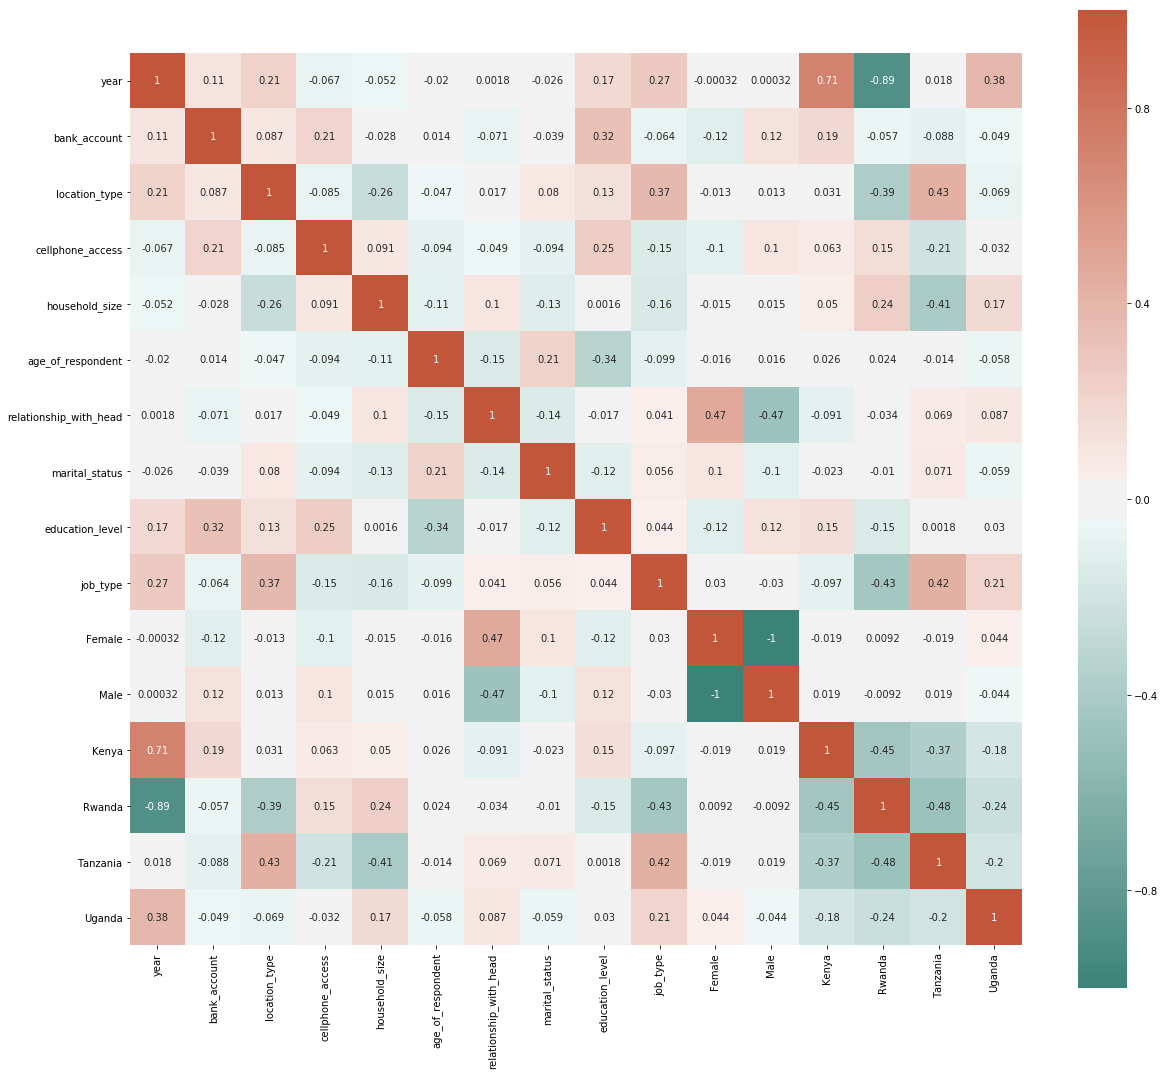

In [9]:
plot_correlation_map(train_cleaned)

In [11]:
sorted(train_cleaned.corr()["bank_account"].iteritems(), key=lambda x:abs(x[1]), reverse=True)[1:9]

[('education_level', 0.3237677193466969),
 ('cellphone_access', 0.20966876534745846),
 ('Kenya', 0.18624229307774512),
 ('Female', -0.11723388834659315),
 ('Male', 0.11723388834659315),
 ('year', 0.11231811296927068),
 ('Tanzania', -0.08834498010357959),
 ('location_type', 0.08728829079218503)]

In [36]:
X= train_cleaned[["year","location_type","cellphone_access","household_size","age_of_respondent","relationship_with_head","marital_status","education_level","job_type","Female","Male","Kenya","Tanzania","Rwanda","Uganda","Has_Education","works_for_gov"]]
y=train_cleaned["bank_account"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(
    train_cleaned2.drop(columns=["bank_account"]),
    train_cleaned2["bank_account"],
    test_size=0.2, 
    random_state=20)

In [185]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy = {:.2f}'.format(logreg.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4036
           1       0.71      0.35      0.47       669

   micro avg       0.89      0.89      0.89      4705
   macro avg       0.81      0.66      0.70      4705
weighted avg       0.87      0.89      0.87      4705

Accuracy = 0.89


In [147]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[3943   93]
 [ 436  233]]


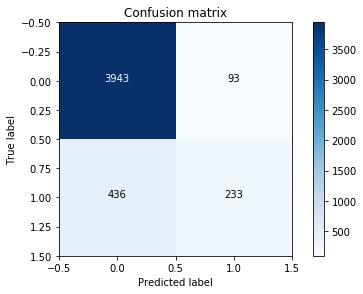

In [148]:
import itertools
cnfe = confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnfe,
                      title='Confusion matrix')
plt.show() 

In [187]:
test_scaled = scaler.transform(test_cleaned2)
predictions = logreg.predict(test_scaled)

In [188]:
data_predictions = pd.DataFrame(predictions,columns=['bank_account'])


In [189]:
data_predictions.insert(0,'unique_id',test1['uniqueid'])

In [190]:
data_predictions["unique_id"]=data_predictions["unique_id"]+' x '+test1['country']

In [191]:
data_predictions.to_csv("Mysubmission1.csv",index=False)

In [192]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.885


In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy = ",accuracy_score(y_pred,y_test))

Accuracy =  0.8839532412327311


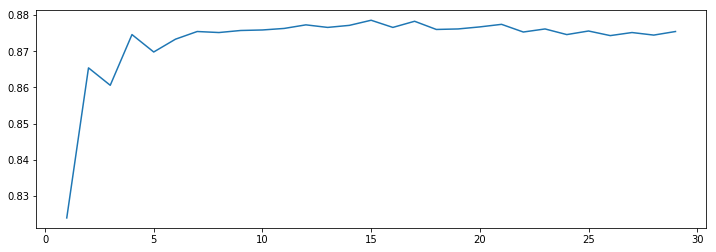

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores=[]
k_range= range(1,30)
for i in k_range :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_pred,y_test))
plt.plot(k_range,scores)    


In [23]:
rfc = RandomForestClassifier(n_estimators=350) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))
print("accuracy = ",accuracy_score(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6065
           1       0.55      0.39      0.46       993

   micro avg       0.87      0.87      0.87      7058
   macro avg       0.73      0.67      0.69      7058
weighted avg       0.86      0.87      0.86      7058

accuracy =  0.8695097761405497


In [24]:
for name, score in zip(X_train, rfc.feature_importances_):
    print(name, score)

year 0.018294133920818308
location_type 0.05298403860748466
cellphone_access 0.040618672470852026
household_size 0.21045694170373752
age_of_respondent 0.09506038046370882
relationship_with_head 0.054378460183593394
marital_status 0.060463194122973137
education_level 0.20686315068809438
job_type 0.186612739029025
Female 0.011871713341729586
Male 0.012640331840558645
Kenya 0.023244404446588516
Tanzania 0.011618908637527944
Rwanda 0.008252671462032029
Uganda 0.0066402590812760275


In [40]:
rfc_predic = rfc.predict(test)
data_predictions1 = pd.DataFrame(rfc_predic,columns=['bank_account'])
data_predictions1.insert(0,'unique_id',test1['uniqueid'])
data_predictions1["unique_id"]=data_predictions1["unique_id"]+' x '+test1['country']
data_predictions1.to_csv("Mysubmission2.csv",index=False)

In [76]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)

In [77]:
from sklearn.metrics import accuracy_score
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))
print("Accuracy = ",accuracy_score(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6065
           1       0.83      0.17      0.29       993

   micro avg       0.88      0.88      0.88      7058
   macro avg       0.86      0.58      0.61      7058
weighted avg       0.87      0.88      0.84      7058

Accuracy =  0.8788608671011618


In [263]:
predictions1 = dtc.predict(test)
data_predictions1 = pd.DataFrame(predictions1,columns=['bank_account'])
data_predictions1.insert(0,'unique_id',test1['uniqueid'])
data_predictions1["unique_id"]=data_predictions1["unique_id"]+' x '+test1['country']
data_predictions1.to_csv("Mysubmission2.csv",index=False)

# XGBOOST

In [194]:
import xgboost as xgb
XGB= xgb.XGBClassifier()
XGB.fit(X_train_scaled,y_train)
pred1=XGB.predict(X_test_scaled)
print ('Accuracy ={:.2f}'.format(XGB.score(X_test_scaled,y_test)))

Accuracy =0.89


In [195]:
xgb_pred = XGB.predict(test_scaled)
xgb_pred = pd.DataFrame(xgb_pred,columns=['bank_account'])
xgb_pred.insert(0,'unique_id',test1['uniqueid'])
xgb_pred["unique_id"]=xgb_pred["unique_id"]+' x '+test1['country']
xgb_pred.to_csv("MysubmissionXGB.csv",index=False)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1,0.15,0.2, 0.25,0.3,0.35,0.4,0.45, 0.5,0.55,0.6,0.65,0.7, 0.75,0.8,0.85,0.9,0.95, 1,1.05,1.1,1.15,1.2,1.25]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.859
Accuracy score (validation): 0.859

Learning rate:  0.1
Accuracy score (training): 0.865
Accuracy score (validation): 0.863

Learning rate:  0.15
Accuracy score (training): 0.874
Accuracy score (validation): 0.877

Learning rate:  0.2
Accuracy score (training): 0.875
Accuracy score (validation): 0.879

Learning rate:  0.25
Accuracy score (training): 0.879
Accuracy score (validation): 0.881

Learning rate:  0.3
Accuracy score (training): 0.881
Accuracy score (validation): 0.883

Learning rate:  0.35
Accuracy score (training): 0.881
Accuracy score (validation): 0.883

Learning rate:  0.4
Accuracy score (training): 0.880
Accuracy score (validation): 0.884

Learning rate:  0.45
Accuracy score (training): 0.883
Accuracy score (validation): 0.884

Learning rate:  0.5
Accuracy score (training): 0.882
Accuracy score (validation): 0.884

Learning rate:  0.55
Accuracy score (training): 0.883
Accuracy score (validation): 0.883

Learning rate: 

# ADA Boost

In [150]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500)
ada = ada.fit(X_train_scaled,y_train)
ada_pred = ada.predict(X_test_scaled)
ada.score(X_test_scaled,y_test)

0.8873538788522848

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500)
ada = ada.fit(X,y)

In [26]:
ada_pred = ada.predict(test)

In [27]:
ada_predictions1 = pd.DataFrame(ada_pred,columns=['bank_account'])
ada_predictions1.insert(0,'unique_id',test1['uniqueid'])
ada_predictions1["unique_id"]=ada_predictions1["unique_id"]+' x '+test1['country']
ada_predictions1.to_csv("Mysubmission3.csv",index=False)

In [31]:
from sklearn.ensemble import BaggingClassifier
bagging =  BaggingClassifier(logreg)
bagging = bagging.fit(X_train,y_train)
bagging.score(X_test,y_test)

0.8761688863700765

# MLP

In [30]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp = mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
mlp.score(X_test,y_test)

0.8720600736752621

#  EXTRA TREES CLASSIFIER

In [33]:

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=200)
etc = etc.fit(X_train,y_train)
etc.score(X_test,y_test)

0.867526211391329

# LDA

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [52]:
test.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type', 'Female', 'Male'],
      dtype='object')

In [53]:
test = lda.transform(test)

# PCA

In [51]:
features=["country","year","location_type","cellphone_access","household_size","age_of_respondent","relationship_with_head","marital_status","education_level","job_type","Female","Male"]
x = train.loc[:,features].values
y = train.loc[:,['bank_account']].values
x = scaler.fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf,train['bank_account']],axis= 1)

In [52]:
x = test.loc[:,features].values
x= scaler.fit_transform(x)
x_pca = pca.fit_transform(x)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, train['bank_account'], test_size=0.30, random_state=30)

In [175]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada = ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
ada.score(X_test,y_test)

0.8887786908472655

Confusion matrix
[[5953  112]
 [ 757  236]]


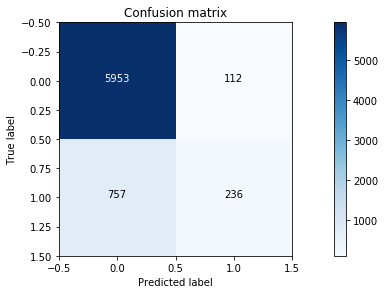

In [176]:
cnfe = confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnfe,
                      title='Confusion matrix')
plt.show()

In [55]:
ada_pca = ada.predict(x_pca)

In [196]:
ada_pred = ada.predict(test)

In [197]:
ada_predictions1 = pd.DataFrame(ada_pred,columns=['bank_account'])
ada_predictions1.insert(0,'unique_id',test1['uniqueid'])
ada_predictions1["unique_id"]=ada_predictions1["unique_id"]+' x '+test1['country']
ada_predictions1.to_csv("Mysubmission4.csv",index=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

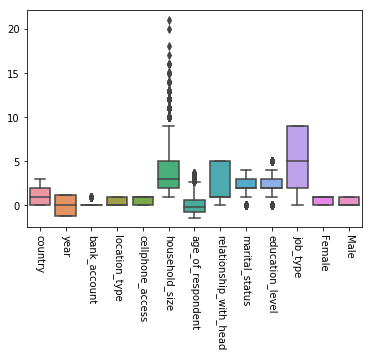

In [61]:
sns.boxplot(data=train)
plt.xticks(rotation=-90)

# SMOTE

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)
X_res, y_res = sm.fit_sample(X_train, y_train.ravel())

In [87]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_res, y_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    7.7s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   11.3s finished
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [88]:
clf.score(X_test,y_test)

0.7384528194956078

In [78]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada = ada.fit(X_res,y_res)
ada_pred = ada.predict(X_test)
ada.score(X_test,y_test)

NameError: name 'X_res' is not defined

In [198]:
ada_pred = ada.predict(test)

In [199]:
ada_predictions1 = pd.DataFrame(ada_pred,columns=['bank_account'])
ada_predictions1.insert(0,'unique_id',test1['uniqueid'])
ada_predictions1["unique_id"]=ada_predictions1["unique_id"]+' x '+test1['country']
ada_predictions1.to_csv("Mysubmission4.csv",index=False)

AUC of LR: 0.836
AUC of ADA: 0.858
AUC of RFC: 0.727
AUC of DTC: 0.799


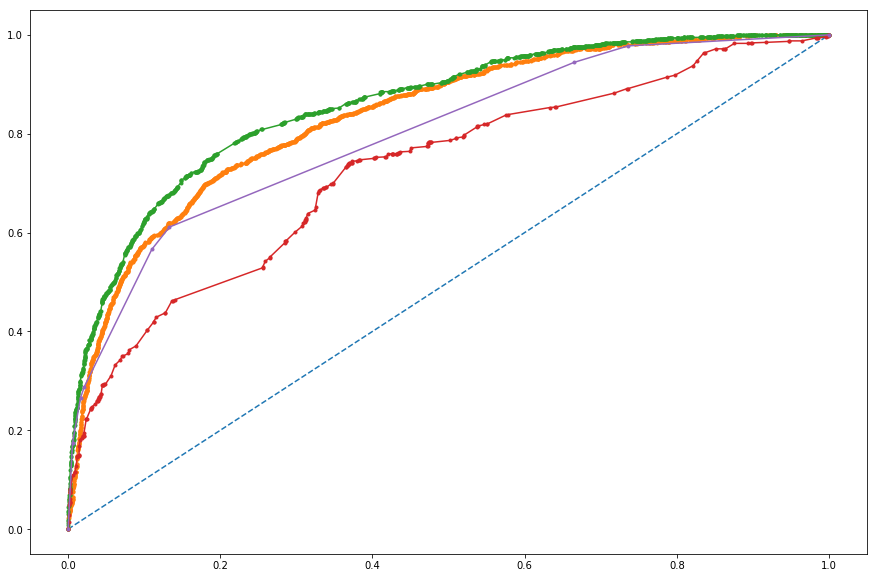

In [284]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
plt.figure(figsize=(15,10))
probs = logreg.predict_proba(X_test)
probs1 = ada.predict_proba(X_test)
probs2 = rfc.predict_proba(X_test)
probs3 = dtc.predict_proba(X_test)
probs = probs[:, 1]
probs1 = probs1[:, 1]
probs2 = probs2[:, 1]
probs3 = probs3[:,1]
auc = roc_auc_score(y_test, probs)
auc1 = roc_auc_score(y_test, probs1)
auc2 = roc_auc_score(y_test, probs2)
auc3 = roc_auc_score(y_test,probs3)
print('AUC of LR: %.3f' % auc)
print('AUC of ADA: %.3f' % auc1)
print('AUC of RFC: %.3f' % auc2)
print('AUC of DTC: %.3f' % auc3)
fpr, tpr, thresholds = roc_curve(y_test, probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probs3)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.plot(fpr1, tpr1, marker='.')
pyplot.plot(fpr2, tpr2, marker='.')
pyplot.plot(fpr3, tpr3, marker='.')
pyplot.show()

# Keras

In [151]:
import tensorflow as tf
from tensorflow.keras import layers

In [153]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(38,)),
  tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=500,
                    batch_size=4096,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)
model.evaluate(X_test_scaled, y_test)

Train on 18819 samples, validate on 4705 samples
Epoch 1/500
18819/18819 [==============================] - 1s 32us/step - loss: 0.5694 - acc: 0.7772 - val_loss: 0.5565 - val_acc: 0.8202
Epoch 2/500
18819/18819 [==============================] - 0s 7us/step - loss: 0.5593 - acc: 0.7923 - val_loss: 0.5485 - val_acc: 0.8249
Epoch 3/500
18819/18819 [==============================] - 0s 7us/step - loss: 0.5518 - acc: 0.8004 - val_loss: 0.5407 - val_acc: 0.8321
Epoch 4/500
18819/18819 [==============================] - 0s 7us/step - loss: 0.5432 - acc: 0.8093 - val_loss: 0.5332 - val_acc: 0.8353
Epoch 5/500
18819/18819 [==============================] - 0s 7us/step - loss: 0.5373 - acc: 0.8170 - val_loss: 0.5260 - val_acc: 0.8397
Epoch 6/500
18819/18819 [==============================] - 0s 7us/step - loss: 0.5298 - acc: 0.8243 - val_loss: 0.5191 - val_acc: 0.8438
Epoch 7/500
18819/18819 [==============================] - 0s 7us/step - loss: 0.5240 - acc: 0.8287 - val_loss: 0.5124 - val_acc

[0.27754073873969876, 0.8920297555791711]

In [155]:
test_scaled = scaler.transform(test_cleaned2.values)
tf_predictions = model.predict(test_scaled)
tf_predictions = pd.DataFrame(tf_predictions,columns=['bank_account'])
tf_predictions.insert(0,'unique_id',test1['uniqueid'])
tf_predictions["unique_id"]=tf_predictions["unique_id"]+' x '+test1['country']
tf_predictions.to_csv("MysubmissionTF.csv",index=False)

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


In [81]:
model = Sequential()
model.add(Dense(input_dim=15, output_dim=12))
model.add(Dense(input_dim=12, output_dim=12))
model.add(Dense(input_dim=12, output_dim=2))
model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, units=12)`

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, units=12)`

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(input_dim=12, units=2)`



In [82]:
scaler = StandardScaler()
model.fit(scaler.fit_transform(X_train.values), y_train,epochs=100)

Epoch 1/100
16466/16466 [==============================] - 2s 150us/step - loss: 0.3750 - acc: 0.8472
Epoch 2/100
16466/16466 [==============================] - 0s 21us/step - loss: 0.3196 - acc: 0.8716
Epoch 3/100
16466/16466 [==============================] - 0s 21us/step - loss: 0.3193 - acc: 0.8716
Epoch 4/100
16466/16466 [==============================] - 0s 22us/step - loss: 0.3188 - acc: 0.8712
Epoch 5/100
16466/16466 [==============================] - 0s 21us/step - loss: 0.3192 - acc: 0.8713
Epoch 6/100
16466/16466 [==============================] - 0s 21us/step - loss: 0.3190 - acc: 0.8712
Epoch 7/100
16466/16466 [==============================] - 0s 22us/step - loss: 0.3191 - acc: 0.8716
Epoch 8/100
16466/16466 [==============================] - 0s 23us/step - loss: 0.3192 - acc: 0.8714
Epoch 9/100
16466/16466 [==============================] - 0s 22us/step - loss: 0.3192 - acc: 0.8716
Epoch 10/100
16466/16466 [==============================] - 0s 22us/step - loss: 0.3191 - 

In [83]:
y_prediction = model.predict_classes(scaler.transform(X_test.values))
print ("\n\naccuracy" , np.sum(y_prediction == y_test) / float(len(y_test)))



accuracy 0.8729101728534996


In [84]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

import numpy as np
import warnings


warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=17)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[mlp,lr,etc , clf1], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([mlp, lr,etc,clf1, sclf], 
                      ['mlp', 
                       'lr','etc','knn',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.86 (+/- 0.00) [mlp]
Accuracy: 0.84 (+/- 0.04) [lr]
Accuracy: 0.71 (+/- 0.22) [etc]
Accuracy: 0.79 (+/- 0.11) [knn]
Accuracy: 0.71 (+/- 0.22) [StackingClassifier]


In [53]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))    
    return test_pred.reshape(-1,1),train_pred

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
model1 = tree.DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [59]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [61]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
#model.score(df_test, y_test)
print(df_test.shape)
print(y_test.shape)

(77638, 2)
(7058,)


# Stacking that actually works 

In [37]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [64]:
# Some useful parameters which will come in handy later on
ntrain = train_cleaned2.shape[0]
ntest = test_cleaned2.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold( n_splits= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [65]:
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier

In [66]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(train_cleaned2)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [161]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}
# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [67]:
xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}


catboost_params = {
    'iterations': 200,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 40,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.7,
    'scale_pos_weight': 5,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'allow_writing_files': False
}

lightgbm_params = {
    'n_estimators':200,
    'learning_rate':0.1,
    'num_leaves':123,
    'colsample_bytree':0.8,
    'subsample':0.9,
    'max_depth':15,
    'reg_alpha':0.1,
    'reg_lambda':0.1,
    'min_split_gain':0.01,
    'min_child_weight':2    
}

In [162]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [68]:
catboost = SklearnHelper(clf=CatBoostClassifier, seed=SEED, params=catboost_params)
xgb = SklearnHelper(clf=XGBClassifier, seed=SEED, params=xgb_params)
lgbm = SklearnHelper(clf=LGBMClassifier, seed=SEED, params=lightgbm_params)

In [69]:
y_train = train_cleaned2['bank_account'].ravel()
train_cleaned2 = train_cleaned2.drop(['bank_account'], axis=1)
x_train = train_cleaned2.values # Creates an array of the train data
x_test = test_cleaned2.values # Creats an array of the test data

In [49]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

NameError: name 'et' is not defined

In [71]:
# Create our OOF train and test predictions. These base results will be used as new features
lgbm_oof_train, lgbm_oof_test = get_oof(lgbm, x_train, y_train, x_test) # Extra Trees
xgb_oof_train, xgb_oof_test = get_oof(xgb,x_train, y_train, x_test) # Random Forest
cat_oof_train, cat_oof_test = get_oof(catboost, x_train, y_train, x_test) # AdaBoost 


print("Training is complete")

0:	total: 13ms	remaining: 2.59s
1:	total: 25.3ms	remaining: 2.5s
2:	total: 37ms	remaining: 2.43s
3:	total: 48.1ms	remaining: 2.35s
4:	total: 59.9ms	remaining: 2.34s
5:	total: 73.5ms	remaining: 2.38s
6:	total: 85ms	remaining: 2.34s
7:	total: 97.1ms	remaining: 2.33s
8:	total: 109ms	remaining: 2.31s
9:	total: 120ms	remaining: 2.28s
10:	total: 132ms	remaining: 2.26s
11:	total: 146ms	remaining: 2.28s
12:	total: 160ms	remaining: 2.3s
13:	total: 172ms	remaining: 2.28s
14:	total: 182ms	remaining: 2.25s
15:	total: 194ms	remaining: 2.23s
16:	total: 208ms	remaining: 2.24s
17:	total: 230ms	remaining: 2.33s
18:	total: 244ms	remaining: 2.32s
19:	total: 256ms	remaining: 2.31s
20:	total: 272ms	remaining: 2.32s
21:	total: 285ms	remaining: 2.31s
22:	total: 297ms	remaining: 2.28s
23:	total: 312ms	remaining: 2.28s
24:	total: 323ms	remaining: 2.26s
25:	total: 335ms	remaining: 2.24s
26:	total: 346ms	remaining: 2.22s
27:	total: 358ms	remaining: 2.2s
28:	total: 369ms	remaining: 2.17s
29:	total: 380ms	remainin

In [86]:
x_train.shape

(22820, 17)

In [167]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[1.57979512e-02 1.46584478e-02 7.93410175e-02 1.38814167e-02
 1.83702072e-02 1.34662371e-02 1.73676655e-02 1.95193406e-02
 1.14871832e-02 2.17965479e-02 3.42450595e-03 4.51521904e-03
 2.97051744e-02 1.65940524e-03 1.62064466e-03 3.34670284e-03
 3.74225832e-03 5.96079430e-03 1.99126297e-05 1.37279656e-02
 6.77858198e-03 2.21754512e-03 4.55932297e-02 1.43677733e-04
 6.45534756e-02 3.19240171e-02 1.52220772e-01 1.03280647e-01
 1.43283584e-04 2.92509093e-03 8.34799127e-02 1.92071070e-01
 2.63519100e-03 7.71892036e-03 1.54598649e-03 2.37889048e-03
 2.69220993e-03 4.28890000e-03]
[1.99909251e-02 3.06259996e-02 7.84429140e-02 4.20055491e-03
 7.75460854e-03 1.26490679e-02 1.39444495e-02 5.62975892e-02
 1.05778371e-02 2.46424044e-02 6.23624306e-03 6.88312974e-03
 3.28847174e-02 1.87246102e-03 1.72198439e-03 2.83864665e-03
 3.44980797e-03 5.52839812e-03 2.56267851e-06 1.60853407e-02
 8.96805704e-03 2.24572773e-03 4.60674649e-02 2.01666047e-04
 6.15762835e-02 3.71344145e-02 1.29229619e-01 9.94483

In [119]:
rf_features = [0.02205724 ,0.03262432, 0.1064319 , 0.01796495 ,0.02636287, 0.03023319
 ,0.01720656 ,0.42861682 ,0.12952454 ,0.01675376 ,0.06027649, 0.0216796,
 0.01794121 ,0.02149129, 0.02180122 ,0.02557075, 0.00346328]
print(len(rf_features))
et_features = [0.02929168, 0.07039986 ,0.13213236, 0.008584 ,  0.01627604, 0.01950861,
 0.01259213 ,0.30534888, 0.07075466, 0.02989719 ,0.12130776 ,0.02191149,
 0.02456045 ,0.07707529, 0.01941821 ,0.03262196 ,0.00831943]
print(len(et_features))
ada_features =[0.004 ,0.008, 0.01 , 0.076 ,0.024, 0.1  , 0.016, 0.418, 0.306 ,0.002, 0.002, 0.
 ,0.002 ,0.002 ,0.002 ,0.006 ,0.022]
print(len(ada_features))
gb_features = [0.01230186 ,0.04541501 ,0.05320673 ,0.05736801, 0.0601205 , 0.03931794
, 0.02873651, 0.38957657 ,0.15897751 ,0.01012928 ,0.02283663, 0.0141792,
 0.0138869  ,0.04215608, 0.01158523 ,0.03136426 ,0.00884177]
print(len(gb_features))

17
17
17
17


In [120]:
cols = train_cleaned.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

In [122]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)

In [123]:
feature_dataframe

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,mean
0,year,0.022057,0.029292,0.004,0.012302,0.016913
1,location_type,0.032624,0.070400,0.008,0.045415,0.039110
2,cellphone_access,0.106432,0.132132,0.010,0.053207,0.075443
3,household_size,0.017965,0.008584,0.076,0.057368,0.039979
4,age_of_respondent,0.026363,0.016276,0.024,0.060121,0.031690
5,relationship_with_head,0.030233,0.019509,0.100,0.039318,0.047265
6,marital_status,0.017207,0.012592,0.016,0.028737,0.018634
7,education_level,0.428617,0.305349,0.418,0.389577,0.385386
8,job_type,0.129525,0.070755,0.306,0.158978,0.166314
9,Has_Education,0.016754,0.029897,0.002,0.010129,0.014695


In [124]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
import plotly.graph_objs as go
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [168]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0


In [126]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [72]:
x_train = np.concatenate(( xgb_oof_train, lgbm_oof_train, cat_oof_train), axis=1)
x_test = np.concatenate(( xgb_oof_test, lgbm_oof_test, cat_oof_test), axis=1)

In [74]:
gbm = XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [75]:
predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
stacking_model_pred = pd.DataFrame(predictions,columns=['bank_account'])
stacking_model_pred.insert(0,'unique_id',test1['uniqueid'])
stacking_model_pred["unique_id"]=stacking_model_pred["unique_id"]+' x '+test1['country']
stacking_model_pred.to_csv("MysubmissionX.csv",index=False)

In [87]:
# add new feature educated : yes or no
# add new feature has income : yes or no
# change age into categories

In [78]:
train = pd.read_csv("Train_v2.csv")

In [79]:
train['Has_Education'] = train["education_level"].apply(
    lambda x: 1 if x=='Primary education' or x=='Secondary education' or x=='Tertiary education'     else 0)

In [80]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Has_Education
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,1


In [71]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [103]:
train_cleaned = cleaning_marital_status(train)

In [104]:
train_cleaned = preprocess_data(train_cleaned)
train_cleaned.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,relationship_with_head,marital_status,education_level,job_type,Female,Male,Kenya,Rwanda,Tanzania,Uganda
0,2018,Yes,0,1,3,1,5,2,3,9,1,0,1,0,0,0
1,2018,No,0,0,5,4,1,4,0,4,1,0,1,0,0,0
2,2018,Yes,1,1,5,1,3,3,5,9,0,1,1,0,0,0
3,2018,No,0,1,5,2,1,2,2,3,1,0,1,0,0,0
4,2018,No,1,0,8,1,0,3,2,5,0,1,1,0,0,0


In [105]:
dic1 = {"Yes" : 1,"No" : 0}
train_cleaned['bank_account']=train_cleaned['bank_account'].map(dic1)

In [108]:
train_cleaned = feature_engineering(train_cleaned)